In [219]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')

In [220]:
data_frame=pd.read_csv('final_data.csv')

In [221]:
data_frame['Latitude']=data_frame['Latitude'].astype(str).str.replace("'",'').astype('float64')

In [222]:
data_frame['Longitude']=data_frame['Longitude'].astype(str).str.replace("'",'').astype('float64')

In [223]:
data_frame.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On,Latitude,Longitude,Location,street_num,street_name,only_sn,address
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,False,False,2422,08A,2007,08/17/2015 03:03:40 PM,42.015799,-87.675756,"42.0157992, -87.6757558",74,074 N ROGERS AVE,N ROGERS AVE,"2422, N ROGERS AVE"
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,True,False,2515,01A,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"41.917838056,-87.755968972",20,020 N LARAMIE AVE,N LARAMIE AVE,"2515, N LARAMIE AVE"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,True,False,1711,01A,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"41.995219444,-87.713354912",62,062 N MC CORMICK RD,N MC CORMICK RD,"1711, N MC CORMICK RD"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,False,False,1922,05,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"41.952345086,-87.677975059",19,019 W BYRON ST,W BYRON ST,"1922, W BYRON ST"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",True,False,632,08B,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"41.737750767,-87.604855911",86,086 S COTTAGE GROVE AVE,S COTTAGE GROVE AVE,"632, S COTTAGE GROVE AVE"


In [224]:
#Has the over all crime rate in chicago increased, decreased, or remained stable in recent years.

In [225]:
#to answer this, we need to create a line plot based on years

In [226]:
import matplotlib.pyplot as plt
import plotly.express as px

In [227]:
#extracting year from Date

In [228]:
data_frame['Only date']=data_frame['Date'].str.split(' ').str[0]

In [229]:
data_frame['month']=data_frame['Only date'].str.split('/').str[0].astype(int)
data_frame['day']=data_frame['Only date'].str.split('/').str[1].astype(int)
data_frame['year']=data_frame['Only date'].str.split('/').str[2].astype(int)

In [230]:
data_frame=data_frame[data_frame['year']!=2024]

In [231]:
data_frame.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On,Latitude,Longitude,Location,street_num,street_name,only_sn,address,Only date,month,day,year
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,False,False,2422,08A,2007,08/17/2015 03:03:40 PM,42.015799,-87.675756,"42.0157992, -87.6757558",74,074 N ROGERS AVE,N ROGERS AVE,"2422, N ROGERS AVE",08/25/2007,8,25,2007
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,True,False,2515,01A,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"41.917838056,-87.755968972",20,020 N LARAMIE AVE,N LARAMIE AVE,"2515, N LARAMIE AVE",05/24/2021,5,24,2021
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,True,False,1711,01A,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"41.995219444,-87.713354912",62,062 N MC CORMICK RD,N MC CORMICK RD,"1711, N MC CORMICK RD",06/26/2021,6,26,2021
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,False,False,1922,05,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"41.952345086,-87.677975059",19,019 W BYRON ST,W BYRON ST,"1922, W BYRON ST",11/09/2023,11,9,2023
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",True,False,632,08B,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"41.737750767,-87.604855911",86,086 S COTTAGE GROVE AVE,S COTTAGE GROVE AVE,"632, S COTTAGE GROVE AVE",11/12/2023,11,12,2023


In [232]:
year_count=data_frame['year'].value_counts().reset_index().sort_values('year')
year_count['year']=year_count['year'].astype(str)

In [233]:
year_count.head()

,year,count
0,2001,483425
1,2002,480196
2,2003,475981
3,2004,469423
4,2005,453769


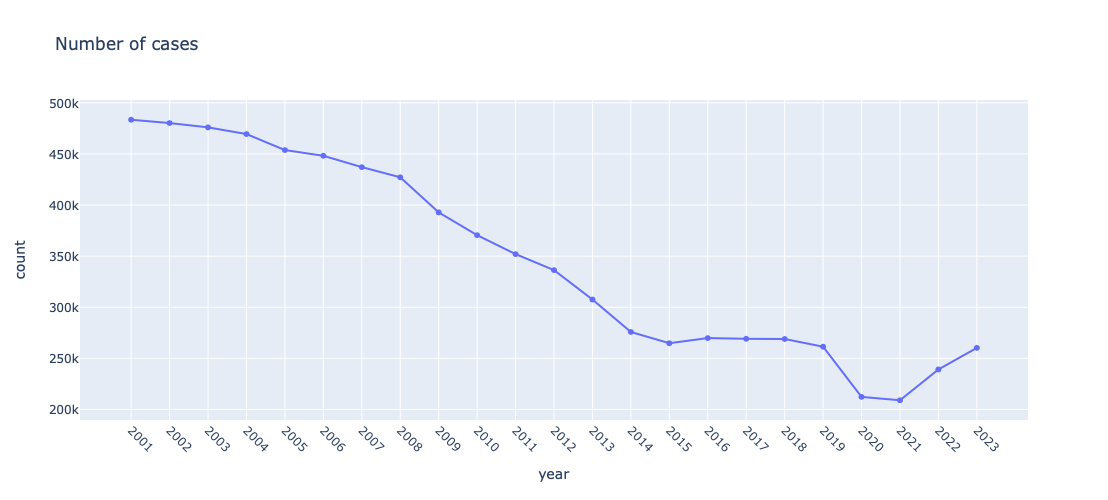

In [234]:
fig=px.line(year_count,x='year',y='count',width=1000,height=500,title='Number of cases',markers=True)
fig.update_layout(xaxis=dict(tickangle=45))
fig.show()

The crime has increased in recent years such as from 2021 to 2023 where the count has raised from 209K to 239K and reached 260K.

In [235]:
#common types of crime that residents should be aware of

In [236]:
recent_year_data=data_frame[data_frame['year'].isin([2021,2022,2023])]

In [237]:
recent_year_data.head(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On,Latitude,Longitude,Location,street_num,street_name,only_sn,address,Only date,month,day,year
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,True,False,2515,01A,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"41.917838056,-87.755968972",20,020 N LARAMIE AVE,N LARAMIE AVE,"2515, N LARAMIE AVE",05/24/2021,5,24,2021
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,True,False,1711,01A,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"41.995219444,-87.713354912",62,062 N MC CORMICK RD,N MC CORMICK RD,"1711, N MC CORMICK RD",06/26/2021,6,26,2021
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,False,False,1922,05,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"41.952345086,-87.677975059",19,019 W BYRON ST,W BYRON ST,"1922, W BYRON ST",11/09/2023,11,9,2023


In [238]:
#getting the most common crime cases
crime_type_count=recent_year_data['Primary Type'].value_counts().reset_index()
crime_type_count.head(15)

,Primary Type,count
0,THEFT,152745
1,BATTERY,125487
2,CRIMINAL DAMAGE,82378
3,ASSAULT,63708
4,MOTOR VEHICLE THEFT,61221
5,DECEPTIVE PRACTICE,50281
6,OTHER OFFENSE,44034
7,ROBBERY,27930
8,WEAPONS VIOLATION,26357
9,BURGLARY,21689


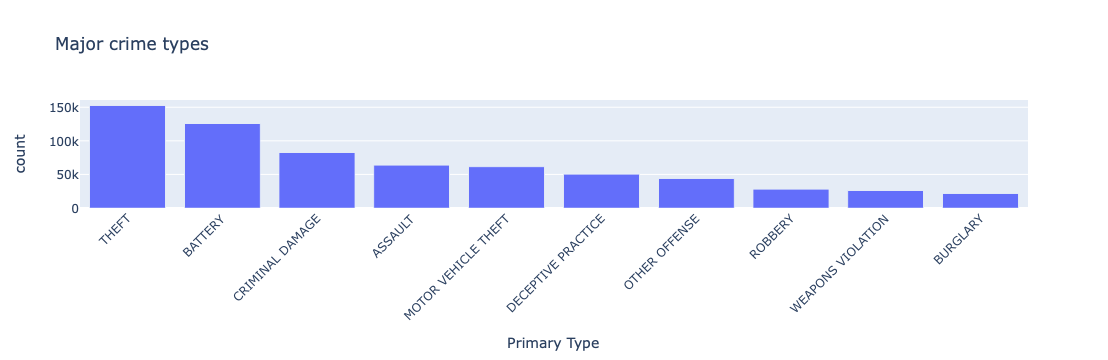

In [239]:
crime_count_fig=px.bar(crime_type_count.iloc[:10],x='Primary Type',y='count',width=500,title='Major crime types')
crime_count_fig.update_layout(xaxis=dict(tickangle=-45))
crime_count_fig.show()

## Time based trends

In [240]:
#are there particular days of the week or time of day that see higher levels of crime

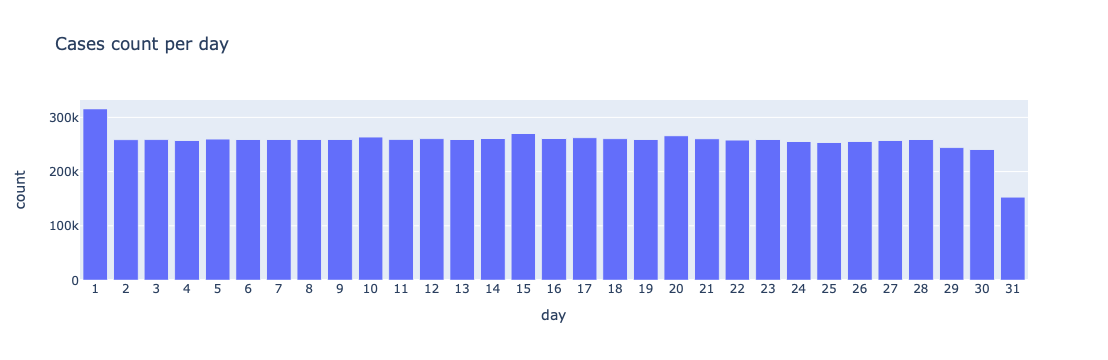

In [285]:
#filter the day by day column
day_count_data=(data_frame['day'].value_counts()).reset_index().sort_values('day')
day_count_data['day']=day_count_data['day'].astype(str)
day_fig=px.bar(day_count_data,x='day',y='count',title='Cases count per day')
day_fig.show()

In [244]:
data_frame['hour']=data_frame['Date'].str.split(' ').str[1].str.split(':').str[0]
data_frame['am/pm']=data_frame['Date'].str.split(' ').str[-1]
data_frame['hour am/pm']=data_frame['hour'].astype(str)+' '+data_frame['am/pm']

In [245]:
data_frame['24h-format']=data_frame['hour']
pm_index=data_frame[data_frame['am/pm']=='PM'].index
data_frame['24h-format'].loc[am_index]=data_frame['hour'].loc[pm_index].astype(int)+12
data_frame['24h-format']=data_frame['24h-format'].astype(str)

In [246]:
data_frame['24h-format'].unique()

array(['09', '15', '07', '17', '24', '21', '14', '16', '10', '11', '12',
       '05', '20', '03', '22', '13', '01', '18', '04', '19', '06', '02',
       '23', '08'], dtype=object)

In [247]:
hour_count=data_frame['24h-format'].value_counts().reset_index().sort_values('24h-format')
hour_count.head()

,24h-format,count
17,01,253089
18,02,213573
20,03,173105
21,04,131798
23,05,110263


Day 1 sees the more of number of cases than the rest of the day in a month

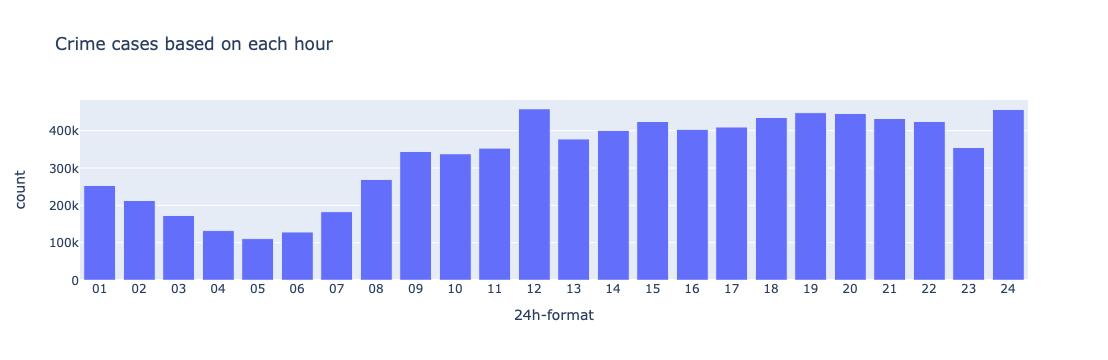

In [248]:
time_count_fig=px.bar(data_frame=hour_count,x='24h-format',y='count',title='Crime cases based on each hour')
time_count_fig.show()

In [249]:
data_frame['date']=data_frame['Date'].str.split(' ').str[0]
data_frame['date']=pd.to_datetime(data_frame['date'])
data_frame['day_name'] = data_frame['date'].apply(lambda x: x.strftime('%A'))

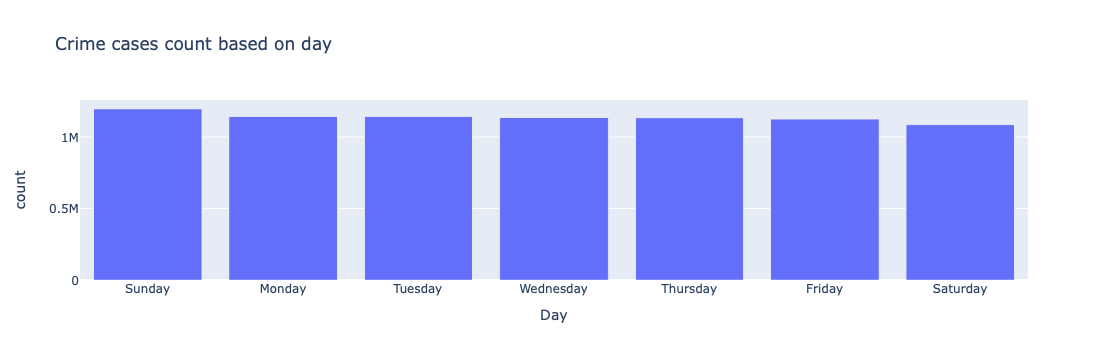

In [296]:
day_count_data=data_frame['day_name'].value_counts().reset_index()
day_count_data_index=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
day_count_data.index=day_count_data_index
day_count_fig=px.bar(data_frame=day_count_data,x=day_count_data_index,y='count',title='Crime cases count based on day',width=600)
day_count_fig.update_layout(xaxis_title='Day')

In [251]:
#calculate how much more percentage than the regular days

In [252]:
#since, 31st repeats rarely throughout the year, the cases count would be low

In [253]:
#Do crime patterns change throughout the year(are there seasonal variations)?

## Seasons in USA
- Spring: March - May
- Summer: June - August
- Fall: September - November
- Winter: December - February

In [254]:
month_dict={
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}

In [255]:
data_frame['month_name']=data_frame['month'].map(month_dict)

In [256]:
#dictionary for season
season_dict={
    'Mar':'Spring',
    'Apr':'Spring',
    'May':'Spring',
    'Jun':'Summer',
    'Jul':'Summer',
    'Aug':'Summer',
    'Sep':'Fall',
    'Oct':'Fall',
    'Nov':'Fall',
    'Dec':'Winter',
    'Jan':'Winter',
    'Feb':'Winter'
}

In [257]:
data_frame['season_name']=data_frame['month_name'].map(season_dict)

In [258]:
data_frame.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On,Latitude,Longitude,Location,street_num,street_name,only_sn,address,Only date,month,day,year,hour,am/pm,hour am/pm,24h-format,date,day_name,month_name,season_name
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,False,False,2422,08A,2007,08/17/2015 03:03:40 PM,42.015799,-87.675756,"42.0157992, -87.6757558",74,074 N ROGERS AVE,N ROGERS AVE,"2422, N ROGERS AVE",08/25/2007,8,25,2007,09,AM,09 AM,09,2007-08-25,Saturday,Aug,Summer
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,True,False,2515,01A,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"41.917838056,-87.755968972",20,020 N LARAMIE AVE,N LARAMIE AVE,"2515, N LARAMIE AVE",05/24/2021,5,24,2021,03,PM,03 PM,15,2021-05-24,Monday,May,Spring
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,True,False,1711,01A,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"41.995219444,-87.713354912",62,062 N MC CORMICK RD,N MC CORMICK RD,"1711, N MC CORMICK RD",06/26/2021,6,26,2021,09,AM,09 AM,09,2021-06-26,Saturday,Jun,Summer
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,False,False,1922,05,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"41.952345086,-87.677975059",19,019 W BYRON ST,W BYRON ST,"1922, W BYRON ST",11/09/2023,11,9,2023,07,AM,07 AM,07,2023-11-09,Thursday,Nov,Fall
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",True,False,632,08B,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"41.737750767,-87.604855911",86,086 S COTTAGE GROVE AVE,S COTTAGE GROVE AVE,"632, S COTTAGE GROVE AVE",11/12/2023,11,12,2023,07,AM,07 AM,07,2023-11-12,Sunday,Nov,Fall


In [259]:
month_count_data=(data_frame['month'].value_counts()/len(data_frame['year'].unique())).reset_index().sort_values('month')

In [260]:
month_count_data['Month Name']=month_count_data['month'].map(month_dict)
month_count_data['Season Name']=month_count_data['Month Name'].map(season_dict)
spring_data=month_count_data[month_count_data['Season Name']=='Spring']
winter_data=month_count_data[month_count_data['Season Name']=='Winter']
summer_data=month_count_data[month_count_data['Season Name']=='Summer']
fall_data=month_count_data[month_count_data['Season Name']=='Fall']

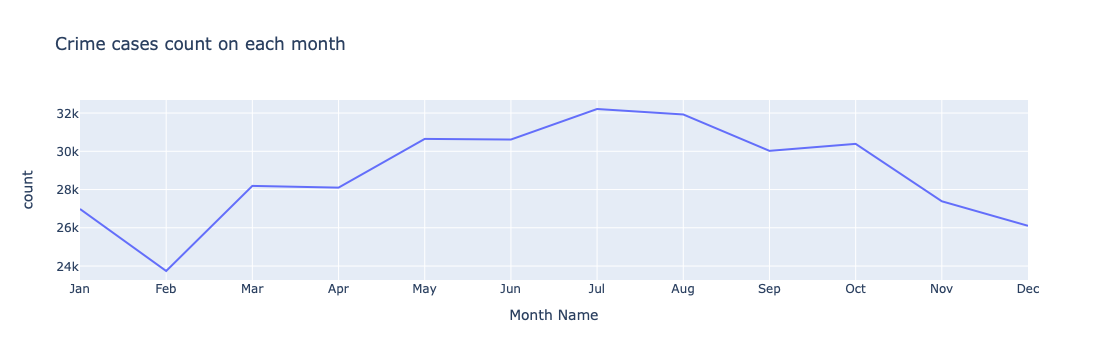

In [261]:
month_fig=px.line(month_count_data,x='Month Name',y='count',title='Crime cases count on each month')
month_fig.show()

In [262]:
#pie chart for seasonal share of cases

In [263]:
seasonal_count_data=(data_frame['season_name'].value_counts()/len(data_frame['year'].unique())).reset_index()

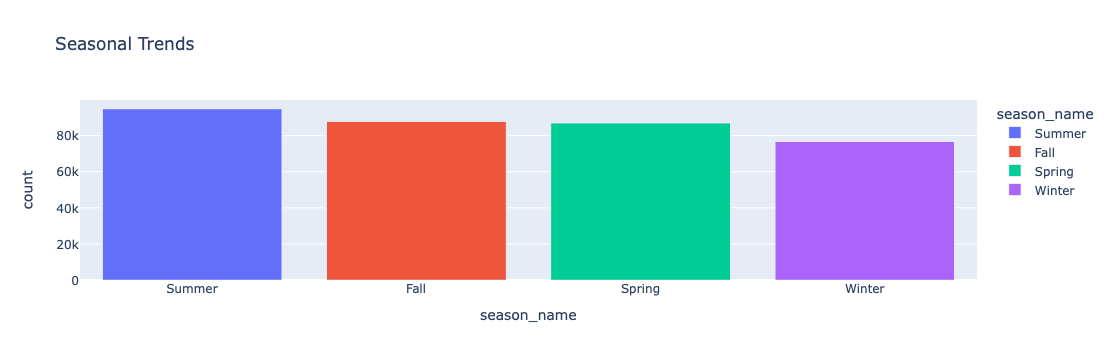

In [293]:
seasonal_bar_fig=px.bar(seasonal_count_data,x='season_name',y='count',color='season_name',width=300,title='Seasonal Trends')
seasonal_bar_fig.show()

In [265]:
seasonal_count_data

,season_name,count
0,Summer,94750.217391
1,Fall,87796.565217
2,Spring,86937.130435
3,Winter,76825.217391


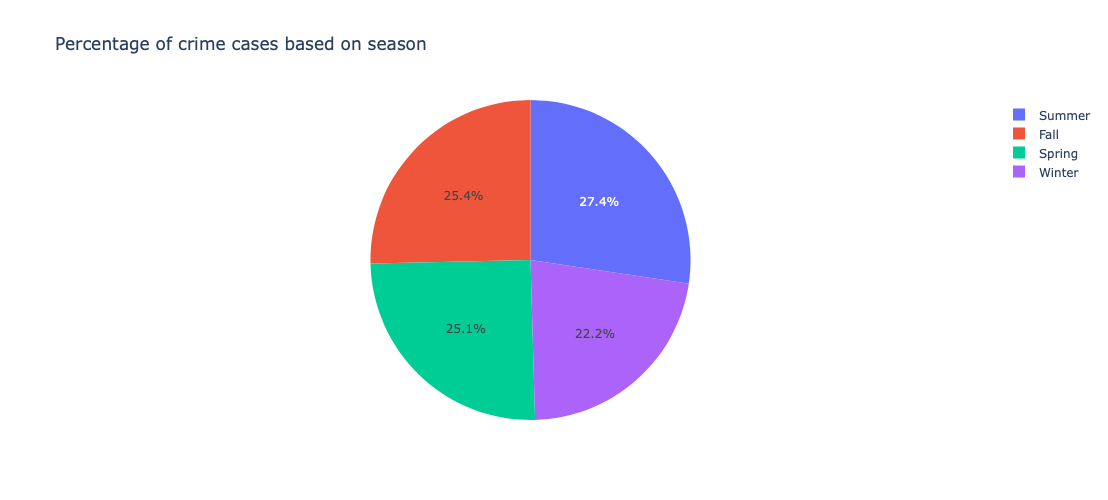

In [289]:
seasonal_fig=px.pie(names=seasonal_count_data['season_name'],values=seasonal_count_data['count'],title='Percentage of crime cases based on season',
                   height=500,width=500)
seasonal_fig.show()

All the seasons has similar percentage of cases recorded. But, there is a difference in percentage between the summer and winter whereas fall and spring are almost equal.

## Location focus


In [267]:
#which neighborhoods or districts have the most significant crime problems 

In [268]:
import json
with open('district_names.json','r') as file:
    district_dict=json.load(file)

In [269]:
with open('final_community_names.json','r') as file:
    community_dict=json.load(file)

In [270]:
data_frame['district_name']=data_frame['ID'].astype(str).map(district_dict)
data_frame['Community Name']=data_frame['Location'].map(community_dict)

In [271]:
data_frame['district_name']=data_frame['district_name'].fillna('Other')
data_frame['Community Name']=data_frame['Community Name'].fillna('Other')

In [272]:
district_count_data=(data_frame['district_name'].value_counts()).reset_index()

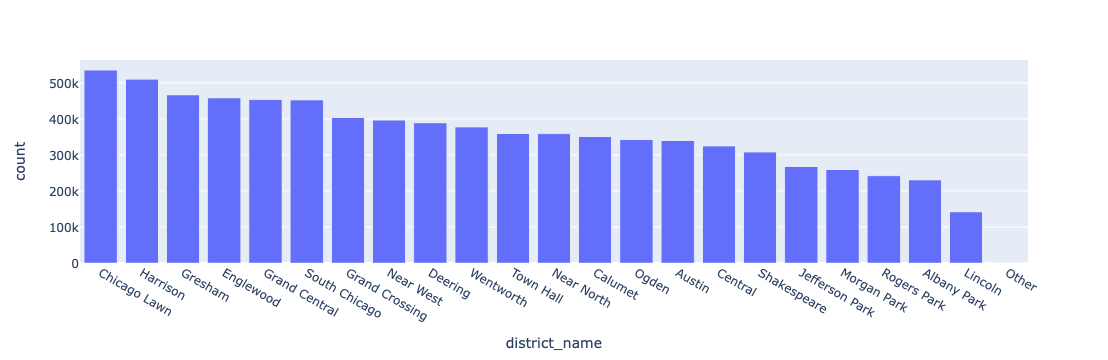

In [273]:
dis_fig=px.bar(data_frame=district_count_data,x='district_name',y='count')
dis_fig.show()

Chicago Lawn, Harrison, Gresham, Englewood, Grand Central, South Chicago, Grand Crossing, Near West, Deering, Wentworth

In [274]:
data_frame.head(1)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On,Latitude,Longitude,Location,street_num,street_name,only_sn,address,Only date,month,day,year,hour,am/pm,hour am/pm,24h-format,date,day_name,month_name,season_name,district_name,Community Name
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,False,False,2422,08A,2007,08/17/2015 03:03:40 PM,42.015799,-87.675756,"42.0157992, -87.6757558",74,074 N ROGERS AVE,N ROGERS AVE,"2422, N ROGERS AVE",08/25/2007,8,25,2007,09,AM,09 AM,09,2007-08-25,Saturday,Aug,Summer,Rogers Park,Rogers Park


In [275]:
community_count_data=(data_frame['Community Name'].value_counts()).reset_index()

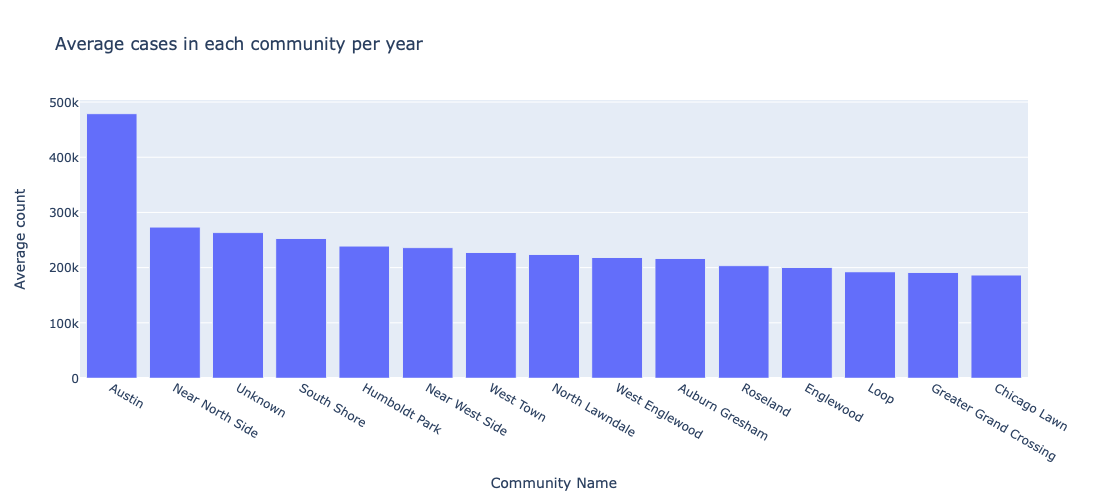

In [276]:
com_fig=px.bar(data_frame=community_count_data.iloc[:15],x='Community Name',y='count',width=1000,height=500,title='Average cases in each community per year')
com_fig.update_layout(yaxis_title='Average count')
com_fig.show()

In [277]:
data_frame.to_csv('final_new_data.csv',index=False)

People in Austin should be more careful because of the higher count

## Specific Crime Insights

In [278]:
crime_type_count

,Primary Type,count
0,THEFT,152745
1,BATTERY,125487
2,CRIMINAL DAMAGE,82378
3,ASSAULT,63708
4,MOTOR VEHICLE THEFT,61221
5,DECEPTIVE PRACTICE,50281
6,OTHER OFFENSE,44034
7,ROBBERY,27930
8,WEAPONS VIOLATION,26357
9,BURGLARY,21689


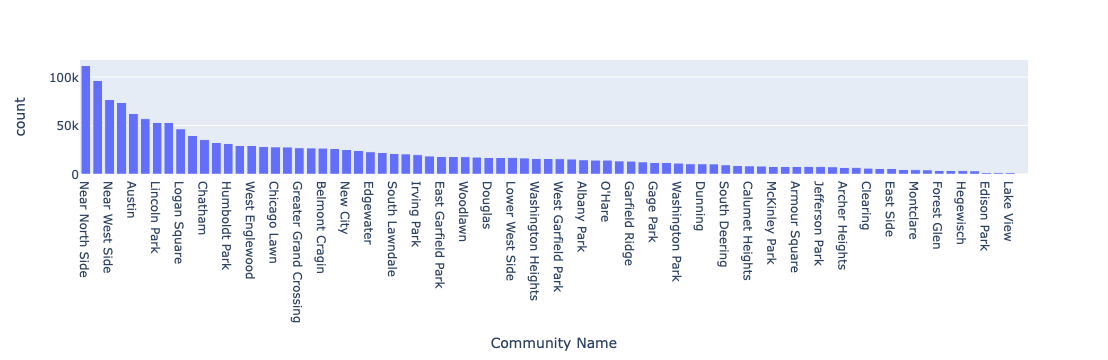

In [279]:
theft_data_count=data_frame[data_frame['Primary Type']=='THEFT']['Community Name'].value_counts().reset_index()
theft_data_fig=px.bar(data_frame=theft_data_count,x='Community Name',y='count')
theft_data_fig.show()

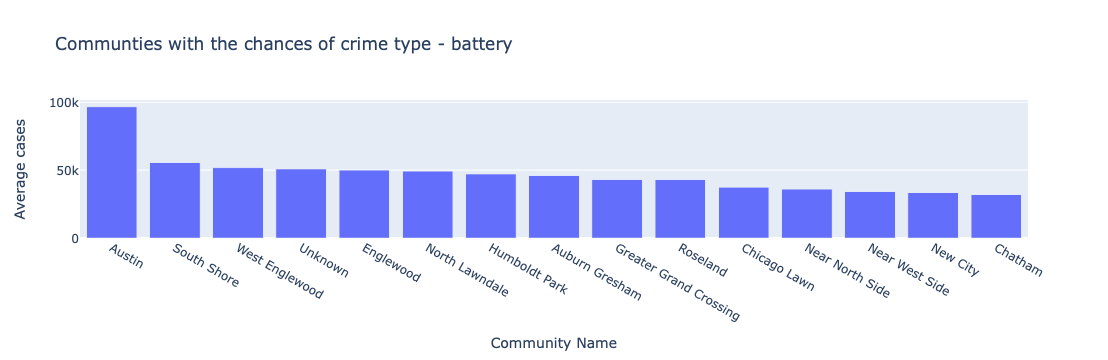

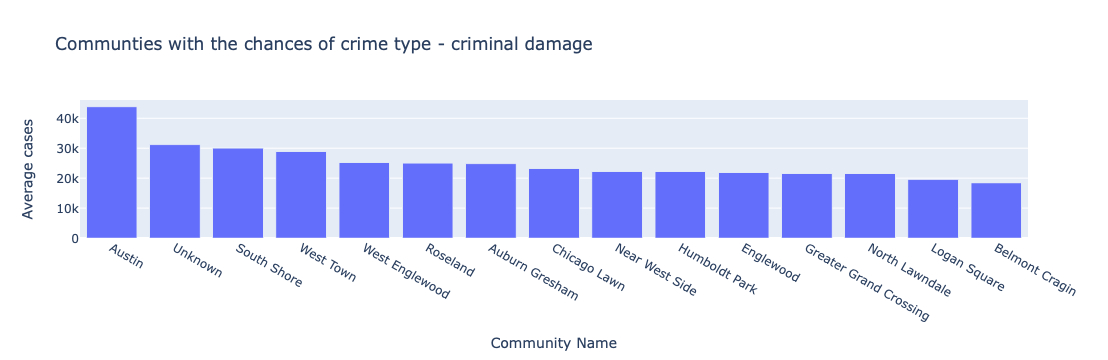

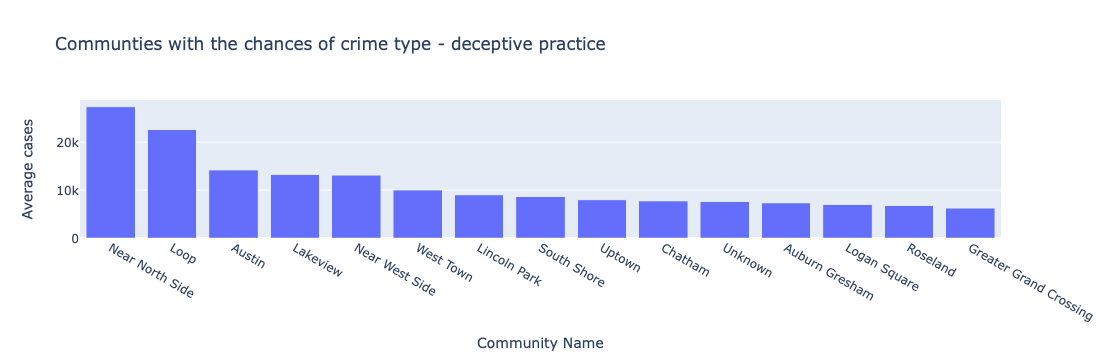

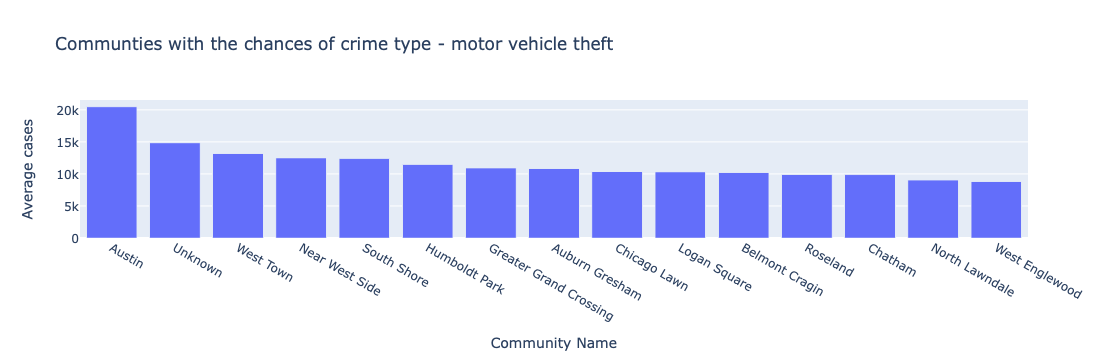

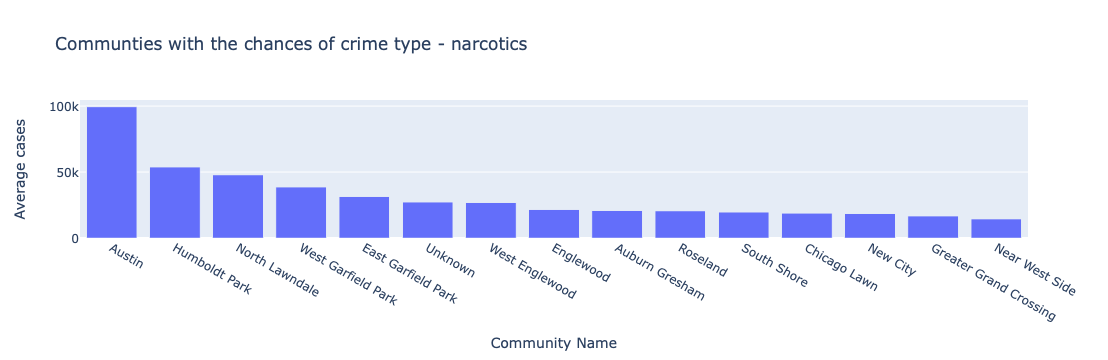

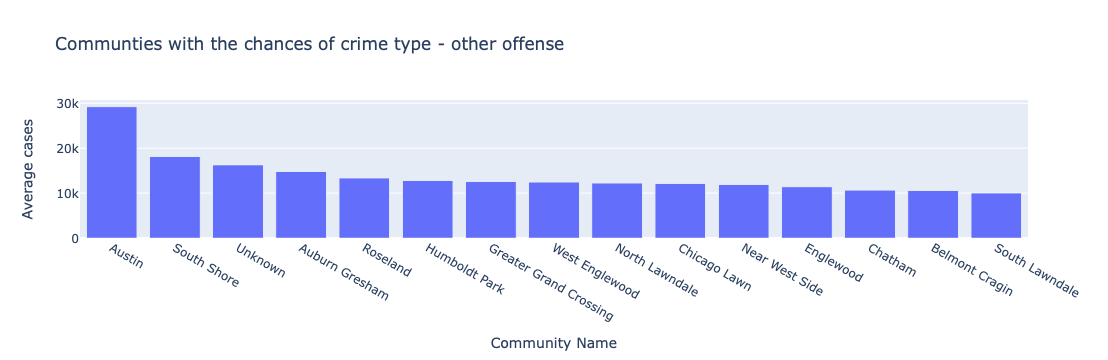

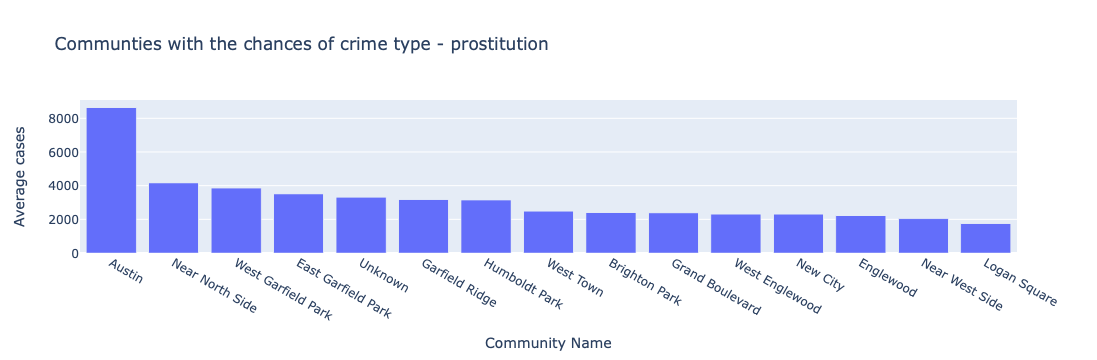

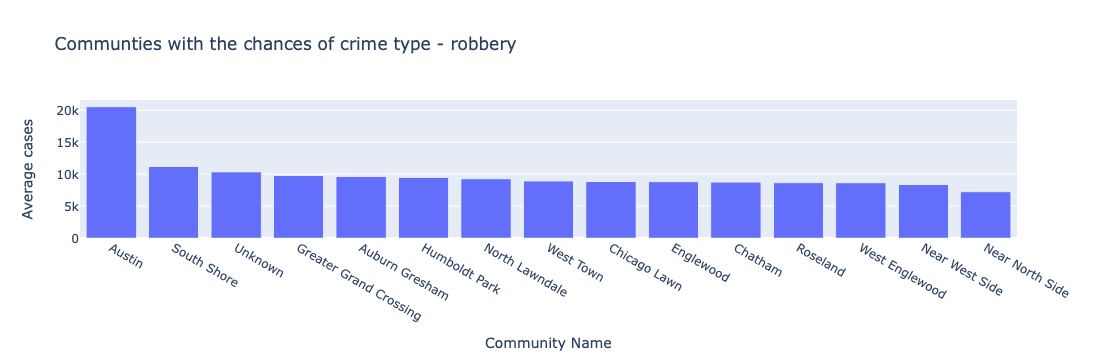

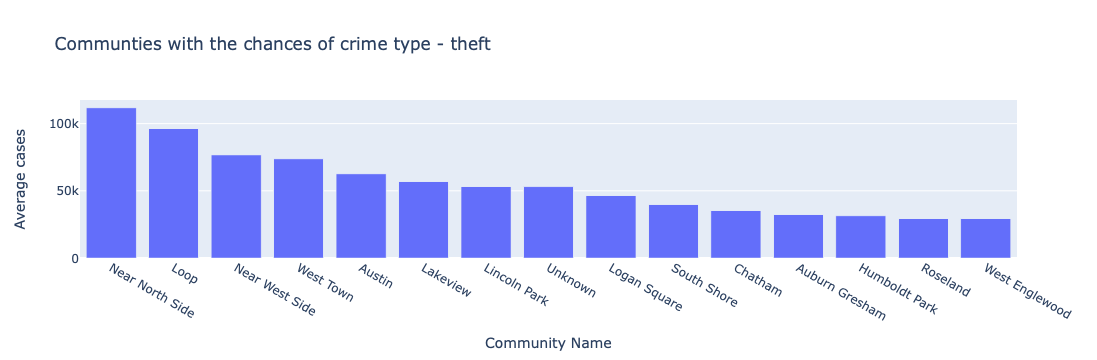

In [280]:
crime_types=['ASSUALT','BATTERY','CRIMINAL DAMAGE','CRIMINAL TRESPRESS','DECEPTIVE PRACTICE','MOTOR VEHICLE THEFT','NARCOTICS',
            'OTHER OFFENSE','PROSTITUTION','PUBLIC PEACE VIOLIATION','ROBBERY','THEFT']
for crime_type in crime_types:
    data_count=(data_frame[data_frame['Primary Type']==crime_type]['Community Name'].value_counts(ascending=False)).reset_index()
    data_count=data_count[data_count['count']>0].iloc[:15]    
    if len(data_count)>0:
        title='Communties with the chances of crime type - '+crime_type.lower()
        data_fig=px.bar(data_frame=data_count,x='Community Name',y='count',title=title)
        data_fig.update_layout(yaxis_title="Average cases")
        data_fig.show()

In [281]:
#getting the community names based on 2021, 2022 and 2023

In [282]:
data_2021=data_frame[data_frame['year']==2021]
data_2022=data_frame[data_frame['year']==2022]
data_2023=data_frame[data_frame['year']==2023]

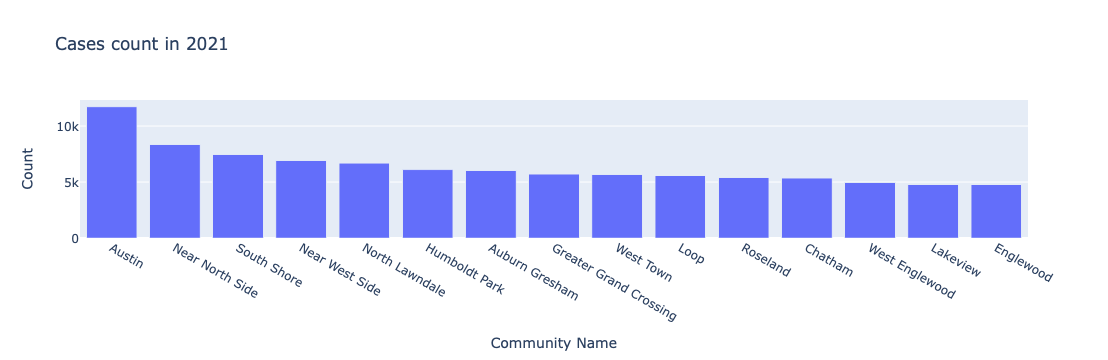

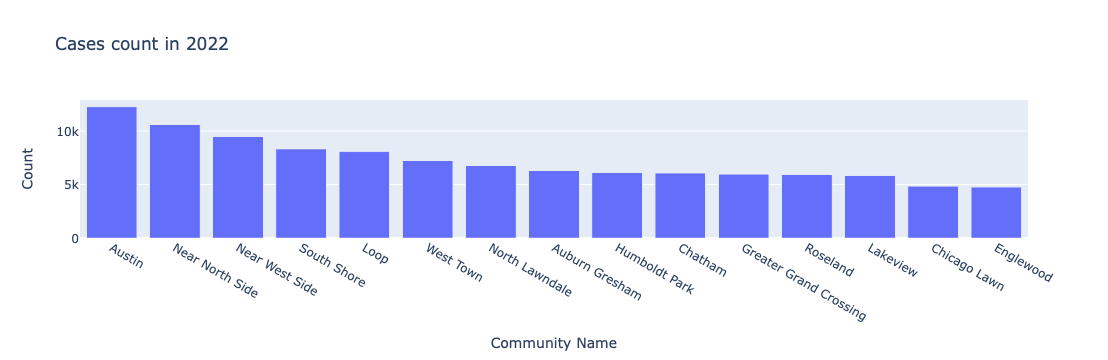

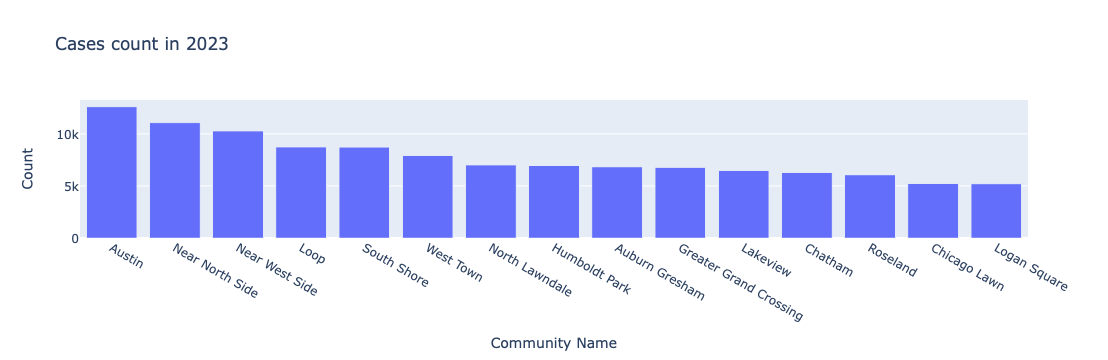

In [283]:
data_2021_count=data_2021['Community Name'].value_counts()[:15]
data_2021_fig=px.bar(data_2021_count,x=data_2021_count.index,y=data_2021_count.values,title='Cases count in 2021')
data_2021_fig.update_layout(yaxis_title='Count')
data_2021_fig.show()
#2022
data_2022_count=data_2022['Community Name'].value_counts()[:15]
data_2022_fig=px.bar(data_2022_count,x=data_2022_count.index,y=data_2022_count.values,title='Cases count in 2022')
data_2022_fig.update_layout(yaxis_title='Count')
data_2022_fig.show()
#2023
data_2023_count=data_2023['Community Name'].value_counts()[:15]
data_2023_fig=px.bar(data_2023_count,x=data_2023_count.index,y=data_2023_count.values,title='Cases count in 2023')
data_2023_fig.update_layout(yaxis_title='Count')
data_2023_fig.show()

In [287]:
data_frame.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On,Latitude,Longitude,Location,street_num,street_name,only_sn,address,Only date,month,day,year,hour,am/pm,hour am/pm,24h-format,date,day_name,month_name,season_name,district_name,Community Name
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,False,False,2422,08A,2007,08/17/2015 03:03:40 PM,42.015799,-87.675756,"42.0157992, -87.6757558",74,074 N ROGERS AVE,N ROGERS AVE,"2422, N ROGERS AVE",08/25/2007,8,25,2007,09,AM,09 AM,09,2007-08-25,Saturday,Aug,Summer,Rogers Park,Rogers Park
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,True,False,2515,01A,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"41.917838056,-87.755968972",20,020 N LARAMIE AVE,N LARAMIE AVE,"2515, N LARAMIE AVE",05/24/2021,5,24,2021,03,PM,03 PM,15,2021-05-24,Monday,May,Spring,Grand Central,Belmont Cragin
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,True,False,1711,01A,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"41.995219444,-87.713354912",62,062 N MC CORMICK RD,N MC CORMICK RD,"1711, N MC CORMICK RD",06/26/2021,6,26,2021,09,AM,09 AM,09,2021-06-26,Saturday,Jun,Summer,Albany Park,North Park
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,False,False,1922,05,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"41.952345086,-87.677975059",19,019 W BYRON ST,W BYRON ST,"1922, W BYRON ST",11/09/2023,11,9,2023,07,AM,07 AM,07,2023-11-09,Thursday,Nov,Fall,Town Hall,North Center
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",True,False,632,08B,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"41.737750767,-87.604855911",86,086 S COTTAGE GROVE AVE,S COTTAGE GROVE AVE,"632, S COTTAGE GROVE AVE",11/12/2023,11,12,2023,07,AM,07 AM,07,2023-11-12,Sunday,Nov,Fall,Gresham,Chatham
